# Data Ingestion and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('data/world_pop_data.csv')

In [2]:
print('Shape', df.shape)
df.columns

Shape (13374, 5)


Index(['CountryName', 'CountryCode', 'Year', 'Total Population',
       'Urban population (% of total)'],
      dtype='object')

In [3]:
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [4]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and `NaN` ('Not-a-Number') types which often indicate missing data. `NaN` values are often used as a place-holder for missing or otherwise invalid data entries. Use `.info()` to determine information about the total count of non-null entries and infer the total count of 'null' entries, which likely indicates missing data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute `.values` to represent a DataFrame df as a NumPy array. You can also pass pandas data structures to NumPy methods.

Your job is to extract the values and store them in an array using the attribute `.values`. You'll then use those values as input into the NumPy `np.log10()` method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy `np.log10()` method and compare the results.

In [6]:
# creates a dataframe when using [[]], Series when using []
df_pop = df[['Total Population']] 

# Create array of DataFrame values: np_vals
np_vals = df_pop.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df_pop)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df_pop', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df_pop has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

### Build a dataFrames from Lists

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the `list()`, `zip()`, `dict()` and `pd.DataFrame()` functions.

**Note**: The zip() function in Python 3 and above returns a special zip object, which is essentially a generator. To convert this zip object into a list, you'll need to use `list()`.

In [7]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values)) # you can pass a zipped obj into 'dict()'

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
pd.DataFrame(data)

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### Labelling Columns

You can use the DataFrame attribute df.columns to view and assign new string labels to columns in a pandas DataFrame.

In [8]:
# display column labels
df.columns

Index(['CountryName', 'CountryCode', 'Year', 'Total Population',
       'Urban population (% of total)'],
      dtype='object')

In [9]:
# re-assign column labels
col_labels = ['a', 'b', 'c', 'd', 'e']
df.columns = col_labels
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [10]:
df.head(2)

,a,b,c,d,e
0,Arab World,ARB,1960,92495902.0,31.285384
1,Caribbean small states,CSS,1960,4190810.0,31.597490


In [11]:
df.columns = ['CountryName', 'CountryCode', 'Year', 'Total Population',
       'Urban population (% of total)']
df.columns

Index(['CountryName', 'CountryCode', 'Year', 'Total Population',
       'Urban population (% of total)'],
      dtype='object')

### Building DataFrames with Broadcasting

You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. Broadcasting allows you to easily populate all the fields in a column with a set value.

In [12]:
df['new_col'] = 0
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total),new_col
0,Arab World,ARB,1960,9.249590e+07,31.285384,0
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490,0
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921,0
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132,0
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 6 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
new_col                          13374 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 627.0+ KB


In [14]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']
data = {'state': 'PA', 'cities': cities}
df_state_cities = pd.DataFrame(data)
df_state_cities

,state,cities
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


### Creating DtaFrames from Files

Use the pandas `.read_csv()` file to load csv files directly into a pandas dataframe.

If the csv file does not have a header, use the `header=None` attribute so pandas does not treat the first row the header.

You can provide a list of column names that can be set when the dataframe is created by using the `names=[col_names_list]` and `header=None` parameters.

```py
df = pd.read_csv('filepath', names=[col_names_list], header=None)
```

If you find a column has a large number of missing values that have been set to `-`, `-1`, etc, then you can replace these when the dataframe is created with the `na_values` attribute, pandas automatically inserts `NaN` values, e.g. replace `-1` with `NaN` with `na_values=-1`.

In [15]:
import pandas as pd
import numpy as np

#  without using any keyword arguments
df_stocks = pd.read_csv('data/messy_stock_data.tsv')
df_stocks.head

<bound method NDFrame.head of                                                    The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
MSFT 45.51 43.08 42.13 43.47 47.53 45.96 45.61 ...                                                NaN                        
# That MSFT is MicroSoft                                                                

Read the file in again, using the keyword arguments `delimiter=' '`, `header=3` and `comment='#'`.

`delimiter=' '` - use a space as a delimiter  
`header=3` - skip the first 3 rows  
`comment=#` - lines starting `#` should not be parsed, i.e.ignored.  


In [16]:
df_stock = pd.read_csv('data/messy_stock_data.tsv', delimiter=' ', header=3, comment='#')
df_stock.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


### Exporting Pandas DataFrames to File

**Note**: You may need to import the `openpyxl` module to export the `xlsx` files

In [17]:
# Save the cleaned up DataFrame to a CSV file without the index
df_stock.to_csv('data/file_clean.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df_stock.to_excel('data/file_clean.xlsx', index=False)

### Plotting Series using Pandas

Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. The pandas `.plot()` method makes calls to matplotlib to construct the plots. We'll use the pandas `.plot()` to visualize the data, and then explore the optional matplotlib input parameters that this `.plot()` method accepts.

By default the 1st line will be blue, the 2nd will be orange. You can style the line using the `style=` property, e.g. `style='k.-'` will return a solid black line with `.` marking the data points.

With `style=`:

- the first character is the colour, `k`: black, `b`: blue, `r`: red, `c`: cyan, and `g`: green.
- the 2nd character is the marker, `o`: circle, `*`: star, `s`: square, and `+`: plus
- the 3rd character is the line, `' '`: dotted, `-`: dash

You can set the title using `title=<your title>`.

Define the kind of plot with the `kind` property, `hist`: histogram, `area`: area plot, `scatter`: scatter plot, etc.

The `subplots=True` property displays multiple variables/columns in separate plots instead of all on one plot.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

col_names = ['Temperature (deg F)']
col_values = [[79.0, 77.4, 76.4, 75.7, 75.1]]
df_temps = pd.DataFrame(dict(zip(col_names, col_values)))
print(type(df_temps))
df_temps.head()

<class 'pandas.core.frame.DataFrame'>


,Temperature (deg F)
0,79.0
1,77.4
2,76.4
3,75.7
4,75.1


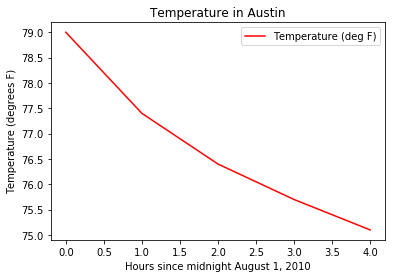

In [19]:
# Create a plot with color='red'
df_temps.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling `.plot()` will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame `df[column_list]` to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created 4 plots.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('data/weather_data_austin_2010.csv')
df.columns

Index(['Temperature', 'DewPoint', 'Pressure', 'Date'], dtype='object')

In [21]:
df_weather = df[['Temperature', 'DewPoint', 'Pressure']]
df_weather = df_weather.iloc[:744]
df_weather.shape

(744, 3)

In [22]:
df_weather.head()

,Temperature,DewPoint,Pressure
0,46.2,37.5,1.0
1,44.6,37.1,1.0
2,44.1,36.9,1.0
3,43.8,36.9,1.0
4,43.5,36.8,1.0


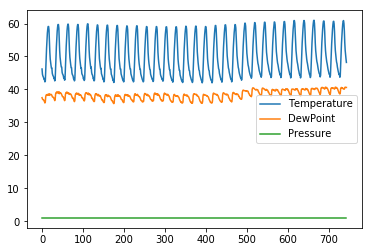

In [23]:
# plot all columns
df_weather.plot()
plt.show()

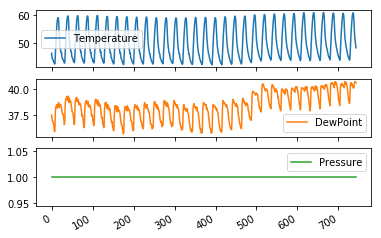

In [24]:
# Plot all columns as subplots. To do so, 
# you need to specify subplots=True inside ''.plot()''
df_weather.plot(subplots=True)
plt.show()

Plot a single column of dew point data. To do this, define a column list containing a single column name `DewPoint`, and call `df[column_list1].plot()`.

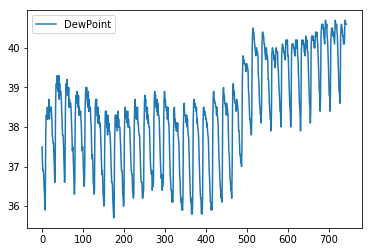

In [25]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
df_weather[column_list1].plot()
plt.show()

Plot two columns of data, `Temperature` and `DewPoint`. To do this, define a list containing those column names and pass it into `df[]`, as `df[column_list2].plot()`.

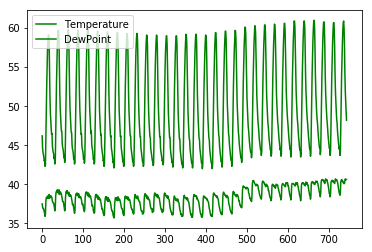

In [33]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df_weather[column_list2].plot(style='g')
plt.show()